In [1]:
path = 'HCMST 2017 fresh sample for public sharing draft v1.1.dta'
import pandas as pd
data = pd.read_stata(path)

## Data preparation

In [2]:
data.head()

,CaseID,CASEID_NEW,qflag,weight1,weight1_freqwt,weight2,weight1a,weight1a_freqwt,weight_combo,weight_combo_freqwt,...,hcm2017q24_met_through_family,hcm2017q24_met_through_friend,hcm2017q24_met_through_as_nghbrs,hcm2017q24_met_as_through_cowork,w6_subject_race,interracial_5cat,partner_mother_yrsed,subject_mother_yrsed,partner_yrsed,subject_yrsed
0,2,2014039,Qualified,NaN,NaN,0.8945,NaN,NaN,0.277188,19240.0,...,no,no,no,no,White,no,12.0,14.0,12.0,14.0
1,3,2019003,Qualified,0.9078,71115.0,NaN,0.9026,70707.0,1.020621,70841.0,...,no,no,no,yes,White,no,12.0,16.0,17.0,17.0
2,5,2145527,Qualified,0.7205,56442.0,NaN,0.7164,56121.0,0.810074,56227.0,...,no,no,no,no,White,no,9.0,7.5,14.0,17.0
3,6,2648857,Qualified,1.2597,98682.0,1.3507,1.2524,98110.0,0.418556,29052.0,...,no,no,no,no,White,no,16.0,12.0,12.0,12.0
4,7,2623465,Qualified,0.8686,68044.0,NaN,0.8636,67652.0,0.976522,67781.0,...,no,no,yes,no,White,no,14.0,17.0,16.0,16.0


In [3]:
data.columns

Index(['CaseID', 'CASEID_NEW', 'qflag', 'weight1', 'weight1_freqwt', 'weight2',
       'weight1a', 'weight1a_freqwt', 'weight_combo', 'weight_combo_freqwt',
       ...
       'hcm2017q24_met_through_family', 'hcm2017q24_met_through_friend',
       'hcm2017q24_met_through_as_nghbrs', 'hcm2017q24_met_as_through_cowork',
       'w6_subject_race', 'interracial_5cat', 'partner_mother_yrsed',
       'subject_mother_yrsed', 'partner_yrsed', 'subject_yrsed'],
      dtype='object', length=285)

In [4]:
y = data['S1']
y.value_counts()

Yes, I am Married       2085
No, I am not Married    1425
Name: S1, dtype: int64

In [5]:
x = data.drop(['S1'], inplace=False, axis=1)
x.head()

,CaseID,CASEID_NEW,qflag,weight1,weight1_freqwt,weight2,weight1a,weight1a_freqwt,weight_combo,weight_combo_freqwt,...,hcm2017q24_met_through_family,hcm2017q24_met_through_friend,hcm2017q24_met_through_as_nghbrs,hcm2017q24_met_as_through_cowork,w6_subject_race,interracial_5cat,partner_mother_yrsed,subject_mother_yrsed,partner_yrsed,subject_yrsed
0,2,2014039,Qualified,NaN,NaN,0.8945,NaN,NaN,0.277188,19240.0,...,no,no,no,no,White,no,12.0,14.0,12.0,14.0
1,3,2019003,Qualified,0.9078,71115.0,NaN,0.9026,70707.0,1.020621,70841.0,...,no,no,no,yes,White,no,12.0,16.0,17.0,17.0
2,5,2145527,Qualified,0.7205,56442.0,NaN,0.7164,56121.0,0.810074,56227.0,...,no,no,no,no,White,no,9.0,7.5,14.0,17.0
3,6,2648857,Qualified,1.2597,98682.0,1.3507,1.2524,98110.0,0.418556,29052.0,...,no,no,no,no,White,no,16.0,12.0,12.0,12.0
4,7,2623465,Qualified,0.8686,68044.0,NaN,0.8636,67652.0,0.976522,67781.0,...,no,no,yes,no,White,no,14.0,17.0,16.0,16.0


### Choosing ge

In [6]:
features = ["Q5", "Q9", "Q16", "w6_sex_frequency", "partner_yrsed", "ppagecat"]

* Q5 same sex couple
* Q9 partner's age
* Q16 relatives seen
* partnet_yrsed partner's educational attainment

In [7]:
x = x[features]

In [8]:
x = x.rename(index=str, columns={
    "Q5": "same_sex",
    "Q9": "partner_age",
    "Q16": "relatives_seen",
    "w6_sex_frequency": "sex_frequency",
    "partner_yrsed": "educational_attainment",
    "ppagecat": "age"
})

In [9]:
x.head()

,same_sex,partner_age,relatives_seen,sex_frequency,educational_attainment,age
0,NaN,NaN,NaN,NaN,12.0,25-34
1,NaN,52,1.0,Once a month or less,17.0,55-64
2,NaN,45,0.0,2 to 3 times a month,14.0,45-54
3,NaN,NaN,NaN,NaN,12.0,25-34
4,NaN,59,0.0,3 to 6 times a week,16.0,55-64


In [10]:
for f in x.columns:
    print("\n################ {} ##########\n".format(f))
    print(x[f].value_counts(dropna=False))


################ same_sex ##########

NaN                                  3042
No, we are an opposite-sex couple     246
Yes, we are a same-sex couple         222
Name: same_sex, dtype: int64

################ partner_age ##########

NaN        654
55.0        79
60.0        73
58.0        70
62.0        66
27.0        64
53.0        64
29.0        63
37.0        63
52.0        63
30.0        62
56.0        61
63.0        60
26.0        60
34.0        58
65.0        58
59.0        57
28.0        56
61.0        56
49.0        55
46.0        54
42.0        54
50.0        53
57.0        53
45.0        51
36.0        50
38.0        50
64.0        50
54.0        49
51.0        48
          ... 
22.0        29
74.0        28
21.0        25
24.0        24
23.0        24
73.0        23
Refused     21
78.0        19
76.0        19
79.0        17
77.0        13
18.0        12
20.0        12
80.0        11
81.0         8
19.0         7
84.0         7
83.0         7
82.0         3
91.0         3

In [11]:
x = x[-pd.isna(x['educational_attainment'])]

In [12]:
x = x[-pd.isna(x['partner_age'])]

In [13]:
x = x[x['partner_age'] != 'Refused']

In [14]:
x = x[-pd.isna(x['relatives_seen'])]

In [15]:
x = x[-pd.isna(x['sex_frequency'])]

In [16]:
x = x[x['sex_frequency'] != 'Refused']

In [17]:
len(x)

2663

In [18]:
dummies_df = pd.get_dummies(x[["sex_frequency", "same_sex", "age"]], dummy_na=True)

In [19]:
dummies_df = dummies_df.drop('sex_frequency_Refused', inplace=False, axis=1)
dummies_df = dummies_df.drop('sex_frequency_nan', inplace=False, axis=1)

In [20]:
dummies_df.head()

,sex_frequency_Once a day or more,sex_frequency_3 to 6 times a week,sex_frequency_Once or twice a week,sex_frequency_2 to 3 times a month,sex_frequency_Once a month or less,"same_sex_Yes, we are a same-sex couple","same_sex_No, we are an opposite-sex couple",same_sex_nan,age_18-24,age_25-34,age_35-44,age_45-54,age_55-64,age_65-74,age_75+,age_nan
1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
5,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
6,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0


In [21]:
X_train = pd.concat([x[["partner_age", "relatives_seen", "educational_attainment"]], dummies_df], axis=1)

In [22]:
print(x.shape, dummies_df.shape)

(2663, 6) (2663, 16)


In [23]:
X_train.head()

,partner_age,relatives_seen,educational_attainment,sex_frequency_Once a day or more,sex_frequency_3 to 6 times a week,sex_frequency_Once or twice a week,sex_frequency_2 to 3 times a month,sex_frequency_Once a month or less,"same_sex_Yes, we are a same-sex couple","same_sex_No, we are an opposite-sex couple",same_sex_nan,age_18-24,age_25-34,age_35-44,age_45-54,age_55-64,age_65-74,age_75+,age_nan
1,52,1.0,17.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
2,45,0.0,14.0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
4,59,0.0,16.0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
5,60,0.0,16.0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
6,67,0.0,13.0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0


### Train model

In [24]:
from xgboost import XGBClassifier

In [25]:
y.head()

0    No, I am not Married
1       Yes, I am Married
2       Yes, I am Married
3    No, I am not Married
4       Yes, I am Married
Name: S1, dtype: category
Categories (2, object): [Yes, I am Married < No, I am not Married]

In [26]:
valid_rows = [int(row) for row in X_train.index]

In [27]:
y = y[valid_rows]

In [190]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
gb_clf = Pipeline([('scaler', StandardScaler()), ('clf', RandomForestClassifier())])
gb_clf = gb_clf.fit(X_train.values, y)

/home/michal/Desktop/xai_mim/venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Observation to be explained

In [236]:
X_train.head()

,partner_age,relatives_seen,educational_attainment,sex_frequency_Once a day or more,sex_frequency_3 to 6 times a week,sex_frequency_Once or twice a week,sex_frequency_2 to 3 times a month,sex_frequency_Once a month or less,"same_sex_Yes, we are a same-sex couple","same_sex_No, we are an opposite-sex couple",same_sex_nan,age_18-24,age_25-34,age_35-44,age_45-54,age_55-64,age_65-74,age_75+,age_nan
1,52.0,1.0,17.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
2,45.0,0.0,14.0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
4,59.0,0.0,16.0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
5,60.0,0.0,16.0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
6,67.0,0.0,13.0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0


* partner 40 years old
* aged 55-64
* 2 relatives seen
* level of education 10
* sex frequency once a day or more
* opposite sex couple

In [208]:
observation = [40, 2, 10, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]

In [209]:
gb_clf.classes_

array(['No, I am not Married', 'Yes, I am Married'], dtype=object)

In [210]:
gb_clf.predict_proba([observation])[0][1]

0.6

In [211]:
import numpy as np

In [212]:
quantiles = np.linspace(0, 1, 40)

In [213]:
partner_splits = np.quantile(X_train['partner_age'], quantiles)

In [214]:
educational_splits = np.unique(X_train['educational_attainment'])

In [215]:
relatives_splits = np.unique(X_train['relatives_seen'])

In [216]:
%matplotlib inline
def ceteris_paribus(splits, variable):
    n_points = len(splits)
    profiles = np.tile(observation, (n_points, 1))
    df = pd.DataFrame(profiles, columns=X_train.columns)
    df[variable] = splits
    df['married'] = gb_clf.predict_proba(df.values)[::,1]
    df.plot(x=variable, y='married')

In [217]:
%matplotlib inline
def pdp(splits, variable):
    n_points = len(splits)
    res_df = pd.DataFrame({variable: splits})
    res_df['married'] = 0
    for i in range(len(X_train)):
        obs = X_train.iloc[i]
        profiles = np.tile(obs, (n_points, 1))
        df = pd.DataFrame(profiles, columns=X_train.columns)
        df[variable] = splits
        res_df['married'] += gb_clf.predict_proba(df.values)[::,1]
    res_df['married'] /= len(X_train)
    res_df.plot(x=variable, y='married')

In [218]:
import matplotlib.pyplot as plt

In [230]:
def ale_plot(splits, variable):
    diffs = [0]
    for i in range(1, len(splits)):
        X_train[variable] = X_train[variable].astype('float')
        points = X_train[(X_train[variable] >= splits[i - 1]) & (X_train[variable] <= splits[i])]
        forward_points = points.copy()
        forward_points[variable] = splits[i]
        backward_points = points.copy()
        backward_points[variable] = splits[i - 1]
        difference = np.mean(gb_clf.predict_proba(forward_points.values)[::, 1] - 
                             gb_clf.predict_proba(backward_points.values)[::, 1])
        diffs.append(difference)
    ale_values = np.cumsum(diffs)
    plt.plot(splits, ale_values)

In [231]:
print(partner_splits)

[10.         22.         25.         26.         27.         28.
 29.         31.         32.         34.         35.         36.82051282
 38.         39.         41.         43.         44.         46.
 47.         49.         50.         51.         53.         54.
 55.         56.         57.         58.         60.         61.
 62.         63.         65.         66.         68.         70.
 72.         74.         78.         95.        ]


#### Wiek partnera
* Szansa pozostania w związku rośnie wraz z wiekiem według wykresu ALE i PDP, co wydaje się być oczekiwanym zachowaniem (zrozumiałem, że w przypadku śmierci nie uwzględniamy obserwacji w zbiorze danych)
* wykres ceteris paribus zachowuje się dziwnie, ale zmiana wieku partnera przy zachowaniu wieku badanej osoby może generować nierealistyczne wyniki

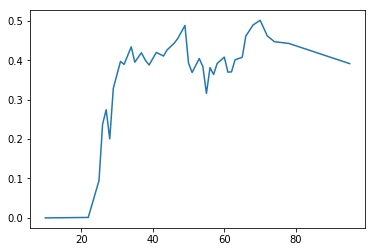

In [232]:
ale_plot(partner_splits, 'partner_age')

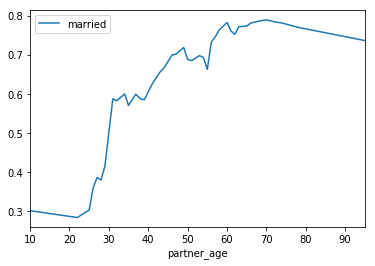

In [233]:
pdp(partner_splits, 'partner_age')

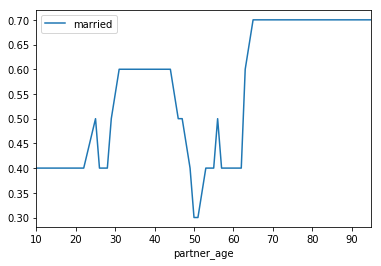

In [223]:
ceteris_paribus(partner_splits, 'partner_age')

#### Poziom wykształcenia partnera


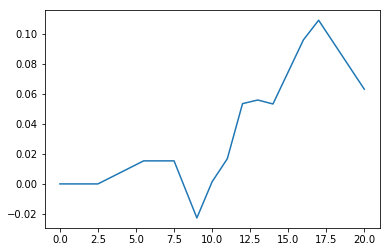

In [234]:
ale_plot(educational_splits, 'educational_attainment')

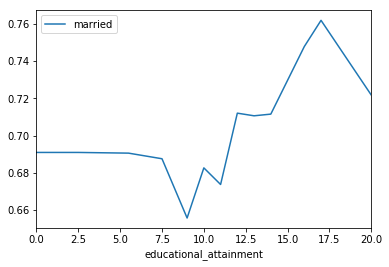

In [225]:
pdp(educational_splits, 'educational_attainment')

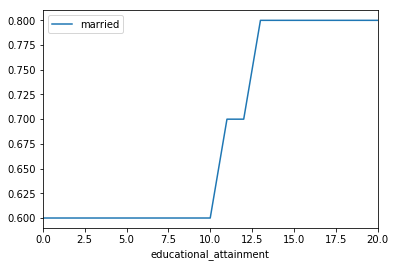

In [226]:
ceteris_paribus(educational_splits, 'educational_attainment')

### Number of seen relatives

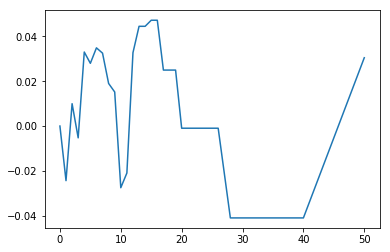

In [235]:
ale_plot(relatives_splits, 'relatives_seen')

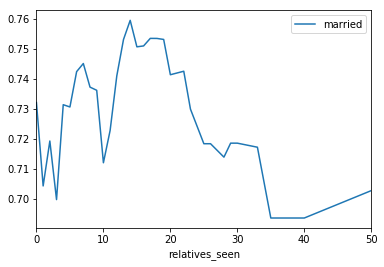

In [228]:
pdp(relatives_splits, 'relatives_seen')

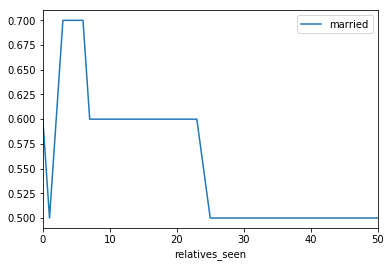

In [229]:
ceteris_paribus(relatives_splits, 'relatives_seen')

### Podsumowanie
Wykresy ALE i PDP wyglądają bardzo podobnie, co wydaje się być zaskakujące biorąc pod uwagę silną korelację zmiennych, np. wiek i wiek partnera, czy wiek i sex_frequency